# Sentimental Analysis Project

- The primary goal of a Sentiment Analysis Project is to develop models and techniques to automatically determine the sentiment of text data. This sentiment is often categorized as positive, negative, or neutral.
- Sentiment Analysis Project involves leveraging NLP techniques and machine learning to classify text data according to sentiment, with applications across various domains for enhancing decision-making and understanding public opinion.

### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Ulta Skincare Reviews.csv")

In [3]:
df.head(5)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [4]:
df.shape

(4150, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4147 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [6]:
df.isna().sum()

Review_Title        0
Review_Text         3
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [9]:
df["Brand"].unique()

array(['Dermalogica'], dtype=object)

In [10]:
df["Product"].unique()

array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

In [11]:
df["Review_Upvotes"].unique()

array([ 0,  3,  1,  2, 20,  4,  7,  5,  8, 11,  6,  9, 25, 14, 12, 17, 15,
       13, 10, 16, 19, 47, 84], dtype=int64)

In [12]:
df["Review_Downvotes"].unique()

array([ 0,  1,  3,  7,  9,  2,  4,  6, 11,  8,  5, 13, 14, 35, 10],
      dtype=int64)

<Axes: xlabel='count', ylabel='Product'>

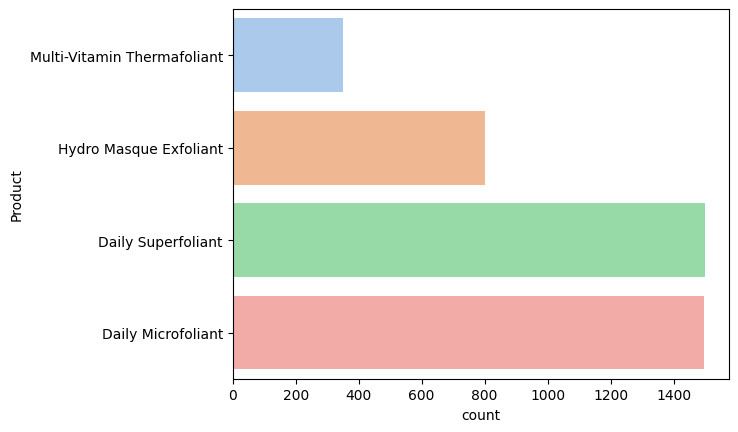

In [13]:
sns.countplot(data=df,y="Product",orient="V",palette="pastel")

Text(0.5, 1.0, 'Review Upvotes Productwise')

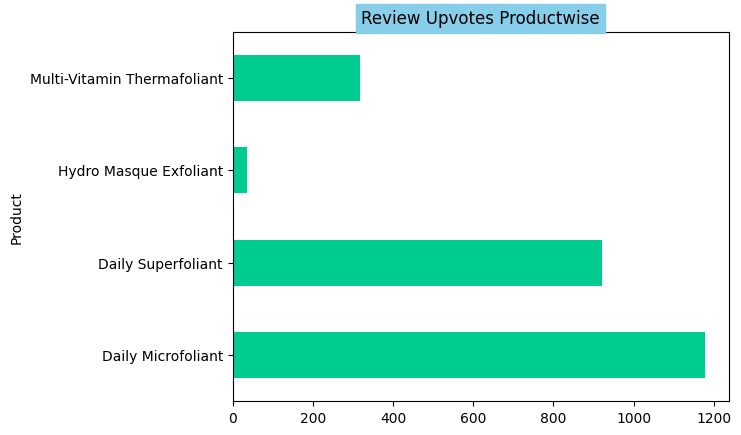

In [14]:
df.groupby('Product').sum()['Review_Upvotes'].plot(kind = 'barh', color='#00CC91')
plt.title("Review Upvotes Productwise", backgroundcolor="SkyBlue")

Text(0.5, 1.0, 'Review Downvotes Productwise')

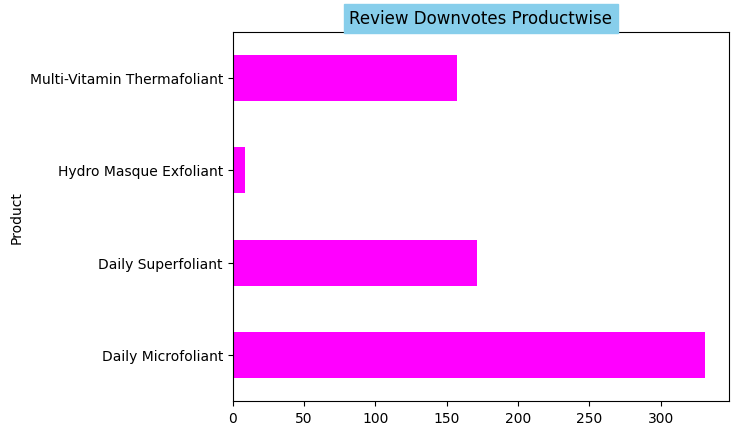

In [15]:
df.groupby('Product').sum()['Review_Downvotes'].plot(kind = 'barh', color='magenta')
plt.title("Review Downvotes Productwise", backgroundcolor="SkyBlue")

<Axes: xlabel='Verified_Buyer', ylabel='count'>

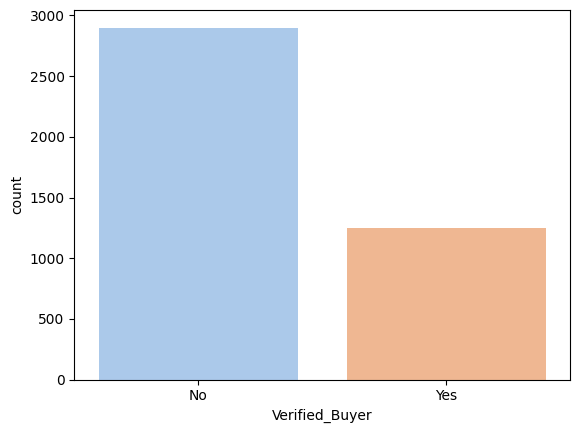

In [16]:
sns.countplot(data=df,x="Verified_Buyer", palette="pastel")

In [17]:
df["Review_Text"]=df["Review_Text"].astype('str')
df["Review_Text"]=df["Review_Text"].apply(lambda x: x.lower())
df["Review_Text"]=df["Review_Text"].apply(lambda x: re.sub('[^a-zA-Z0-9]',' ',x))
df["Review_Text"]=df["Review_Text"].apply(lambda x: word_tokenize(x))

In [18]:
df["Review_Text"]

0       [love, using, this, on, my, face, while, in, t...
1       [even, better, than, the, daily, microfoliant,...
2       [enjoy, this, product, so, much, i, look, forw...
3       [i, ve, never, tried, anything, like, this, be...
4       [this, exfoliates, very, nicely, and, gives, a...
                              ...                        
4145              [much, better, product, than, a, scrub]
4146    [i, ve, been, using, this, exfoliant, for, a, ...
4147    [my, skin, looks, better, now, than, 10, years...
4148    [this, product, was, useless, for, me, i, shou...
4149    [this, product, is, amazing, it, is, the, only...
Name: Review_Text, Length: 4146, dtype: object

- The original text in the Review_Text column is converted to lowercase using .apply(lambda x: x.lower()).
- Then, re.sub('[^a-zA-Z0-9]', ' ', x) is applied to each element (x) in the Review_Text column. This replaces any non-alphanumeric characters (like punctuation or special symbols) with spaces.
- word_tokenize(x): Tokenizes each sentence x into a list of tokens (words and punctuation marks).

In [62]:
df['Review_Text'] = df['Review_Text'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])

- stopwords.words('english'): Retrieves a list of common stopwords in English from NLTK's corpus. Stopwords are words that are considered non-informative for text analysis tasks, such as 'the', 'and', 'is', etc.

In [20]:
df["Review_Text"]

0       [love, using, face, shower, heats, gives, ligh...
1       [even, better, daily, microfoliant, obsessed, ...
2       [enjoy, product, much, look, forward, using, r...
3       [never, tried, anything, like, love, apply, fa...
4       [exfoliates, nicely, gives, smooth, skin, irri...
                              ...                        
4145                       [much, better, product, scrub]
4146    [using, exfoliant, months, depending, conditio...
4147                [skin, looks, better, 10, years, ago]
4148    [product, useless, known, exfoliant, use, dail...
4149    [product, amazing, thing, helps, dry, patches,...
Name: Review_Text, Length: 4146, dtype: object

### Importing Porterstemmer

In [21]:
from nltk.stem import PorterStemmer

In [22]:
ps=PorterStemmer()

In [23]:
all_stopwords = stopwords.words('english')

In [24]:
all_stopwords.remove('not')

In [25]:
df['Review_Text'] = df['Review_Text'].apply(lambda x: [ps.stem(word) for word in x if word not in set(all_stopwords)])

- Stemming: Stemming reduces words to their root or base form, which helps in consolidating words with similar meanings.

In [26]:
df['Review_Text'] = df['Review_Text'].apply(lambda x: ' '.join(x))

In [27]:
df["Review_Text"]

0         love use face shower heat give light scrub nice
1       even better daili microfoli obsess skin much s...
2       enjoy product much look forward use realli fee...
3       never tri anyth like love appli face get littl...
4       exfoli nice give smooth skin irrit reaction sk...
                              ...                        
4145                            much better product scrub
4146    use exfoli month depend condit skin use anywhe...
4147                         skin look better 10 year ago
4148    product useless known exfoli use daili would g...
4149    product amaz thing help dri patch cheek also c...
Name: Review_Text, Length: 4146, dtype: object

### Importing Textblob

In [28]:
from textblob import TextBlob

In [29]:
df['Polarity'] = df['Review_Text'].map(lambda x: TextBlob(x).sentiment.polarity)

+ ".sentiment.polarity: Computes the sentiment polarity of the TextBlob object. 
+ The sentiment polarity is a float value between -1.0 and 1.0, where:

In [30]:
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Polarity
0,Perfect,love use face shower heat give light scrub nice,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.500000
1,You need this,even better daili microfoli obsess skin much s...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.350000
2,Clean skin,enjoy product much look forward use realli fee...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.466667
3,Love This Stuff!,never tri anyth like love appli face get littl...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.600000
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.500000


array([[<Axes: title={'center': 'Polarity'}>]], dtype=object)

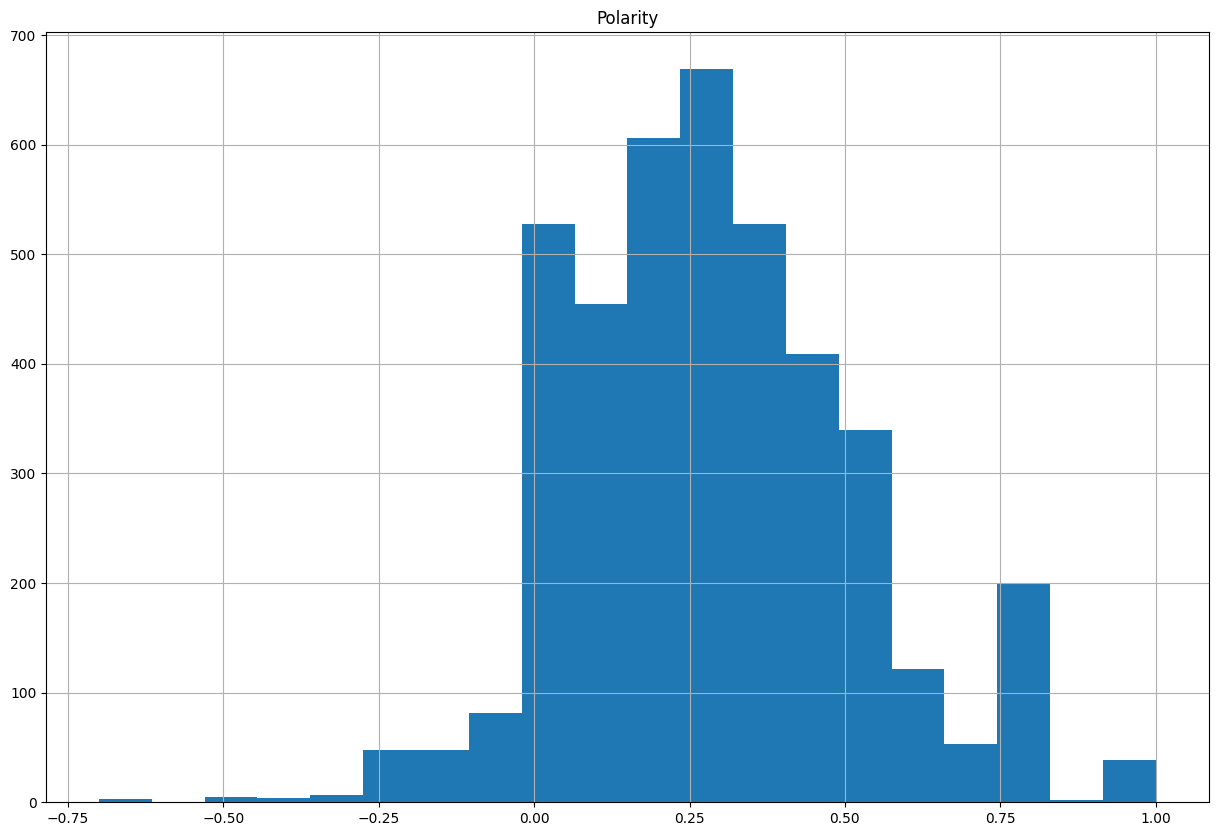

In [31]:
df[["Polarity"]].hist(bins=20, figsize=(15, 10))

### Applying a Binary Sentiment Classification:

In [32]:
df['Sentiment'] = df['Polarity'].apply(lambda x: 1 if x >= 0 else 0)

In [33]:
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Polarity,Sentiment
0,Perfect,love use face shower heat give light scrub nice,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.500000,1
1,You need this,even better daili microfoli obsess skin much s...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.350000,1
2,Clean skin,enjoy product much look forward use realli fee...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.466667,1
3,Love This Stuff!,never tri anyth like love appli face get littl...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.600000,1
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.500000,1


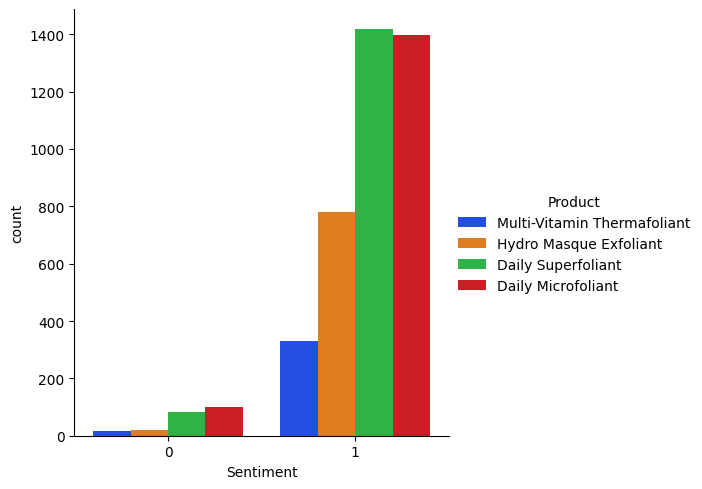

In [34]:
g = sns.catplot(x='Sentiment', kind='count', data=df, hue='Product', palette='bright')

In [35]:
df['Sentiment'].value_counts()

Sentiment
1    3926
0     220
Name: count, dtype: int64

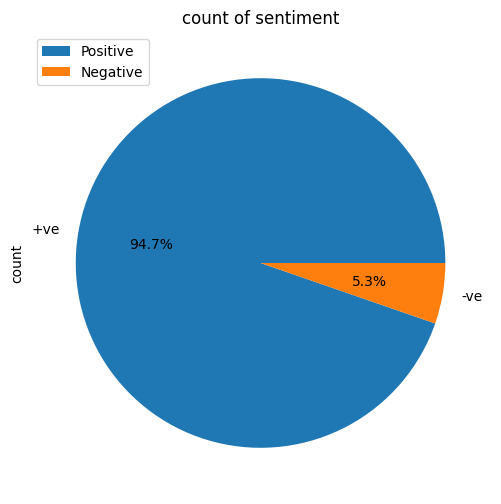

In [36]:
df['Sentiment'].value_counts().plot.pie(figsize=(6,6) , title='count of sentiment' ,labels=['+ve','-ve'],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=2)

In [37]:
X = df['Review_Text']
y = df['Sentiment']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Importing CountVectorizer

+ CountVectorizer is essential for converting text data into numerical format that machine learning algorithms can process.
+ Each document (or text entry) is transformed into a vector of term (word) counts, which can then be used as features for training models like classifiers, regressors, or clustering algorithms.

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
cv = CountVectorizer()

In [42]:
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

### 1.Applying SVM Model

In [43]:
svm_clf = SVC(kernel='linear', random_state=42)

In [44]:
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [45]:
svm_pred = svm_clf.predict(X_test)

In [46]:
svm_accuracy = accuracy_score(y_test, svm_pred)

In [47]:
print('SVM accuracy:', svm_accuracy)

SVM accuracy: 0.9493975903614458


### 2.Applying Naive Bayes Algorithm

In [48]:
clf=MultinomialNB()

In [49]:
clf.fit(X_train,y_train)

MultinomialNB()

In [50]:
y_pred=clf.predict(X_test)

In [51]:
nb_accuracy = accuracy_score(y_test, y_pred)

In [52]:
print('Naive Bayes accuracy:', nb_accuracy)

Naive Bayes accuracy: 0.9337349397590361


#### Importing Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[  0,  50],
       [  5, 775]], dtype=int64)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [56]:
y_pred = svm_clf.predict(X_test)

In [57]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 20,  30],
       [ 12, 768]], dtype=int64)

In [58]:
accuracy_score(y_test, y_pred)

0.9493975903614458

# 1. Prediction

In [59]:
new_text = ["bad girl"]
new_text_vectorized = cv.transform(new_text)

- Inputs for predicting sentiments

In [60]:
predicted_sentiment = svm_clf.predict(new_text_vectorized)

if predicted_sentiment[0] == 1:
    sentiment_label = "Positive"
else:
    sentiment_label = "Negative"

print("Predicted Sentiment:", sentiment_label)

Predicted Sentiment: Negative


# 2. Prediction

In [61]:
data = {'Review_Text': ['I love this product!', 'This is the worst thing I ever bought.', 'It is okay, not great.']}
df = pd.DataFrame(data)

# Calculate polarity
df['Polarity'] = df['Review_Text'].map(lambda x: TextBlob(x).sentiment.polarity)

print(df)

                              Review_Text  Polarity
0                    I love this product!     0.625
1  This is the worst thing I ever bought.    -1.000
2                  It is okay, not great.     0.050


- The review "I love this product!" has a positive sentiment with a polarity of 0.5, resulting in a Sentiment value of 1.
- The review "This is the worst thing I ever bought." has a negative sentiment with a polarity of -1.0, resulting in a Sentiment value of 0.
- The review "It is okay, not great." has a slightly positive sentiment with a polarity of 0.25, resulting in a Sentiment value of 1.